In [1]:
from pandas.plotting import parallel_coordinates
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import missingno as msno
import networkx as nx
import seaborn as sns
import pandas as pd
from math import pi
import numpy as np
data = pd.read_csv(r'C:\Users\berka\Google Drive\code\Data-Science---Artificial-Intelligence\Visualization\4. Rare Used Visualization Tools\Iris.csv')

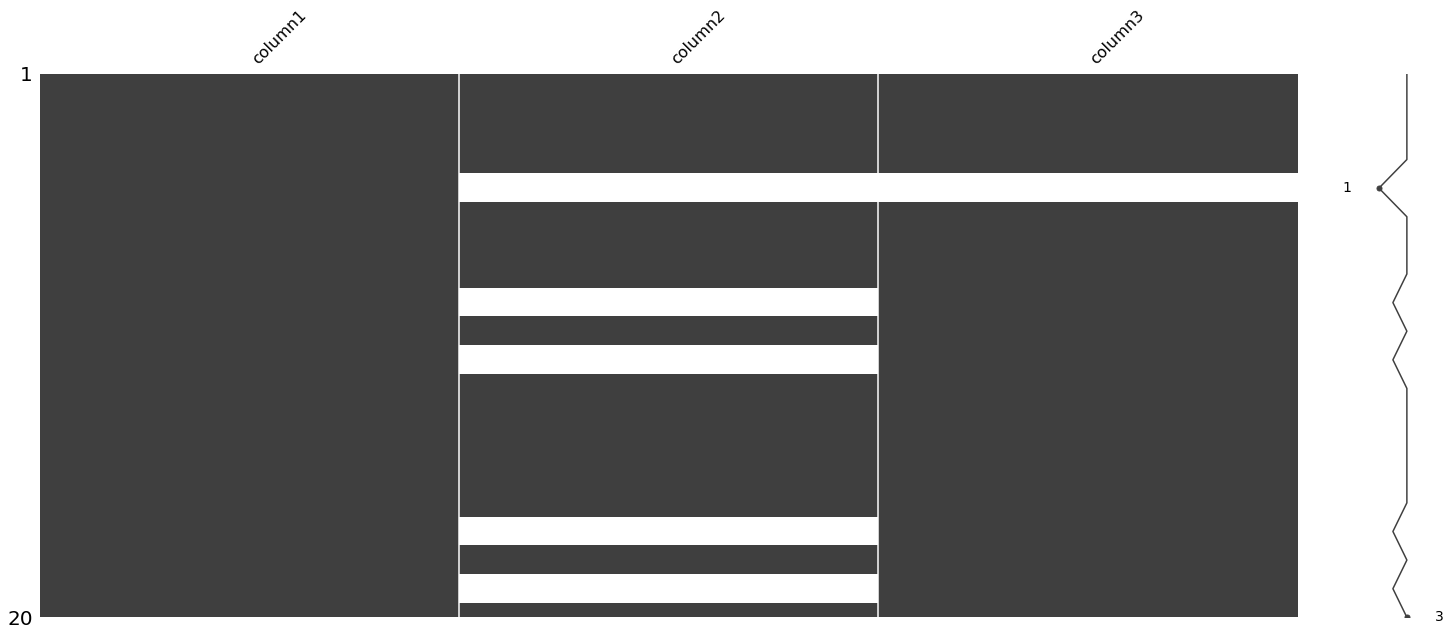

In [2]:
# Matrix and Box Plot
dictionary = {'column1':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
              'column2':[1,2,3,4,np.nan,6,7,8,np.nan,10,np.nan,12,13,14,15,16,np.nan,18,np.nan,20],
              'column3':[1,2,3,4,np.nan,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
             }
data_missingno = pd.DataFrame(dictionary)
msno.matrix(data_missingno)
plt.show()

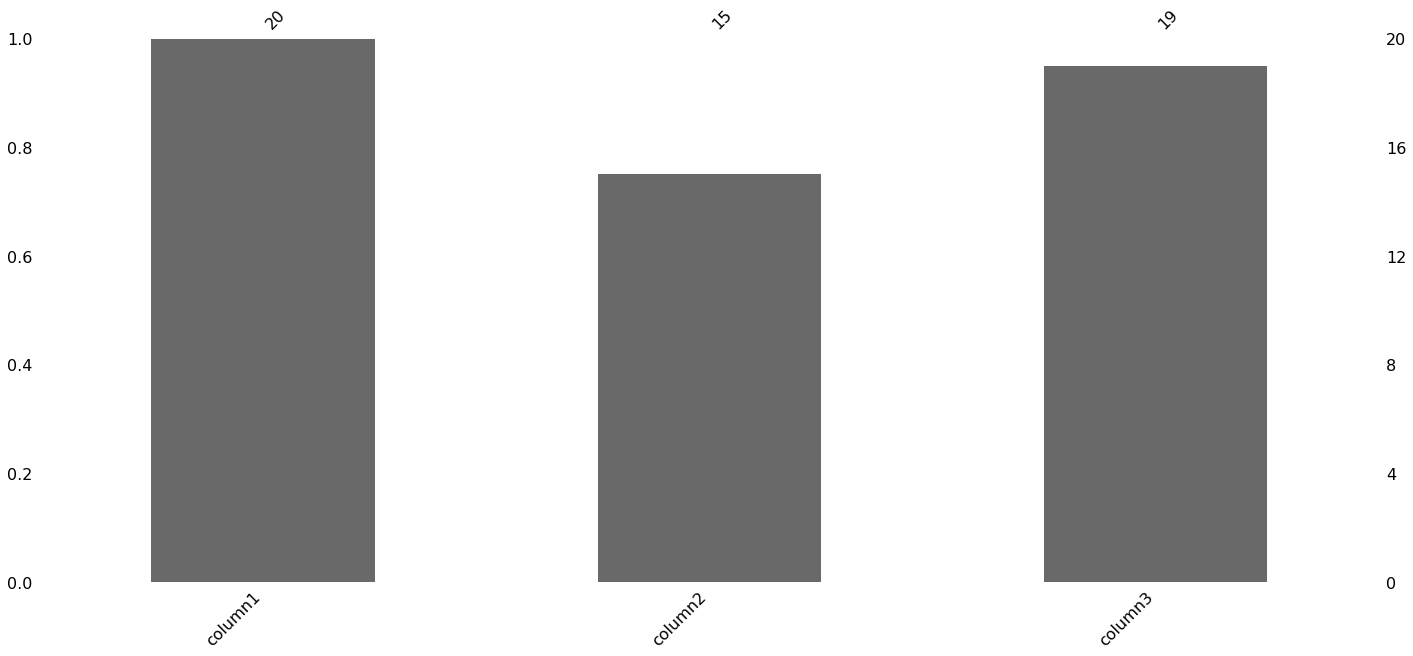

In [3]:
msno.bar(data_missingno)
plt.show()

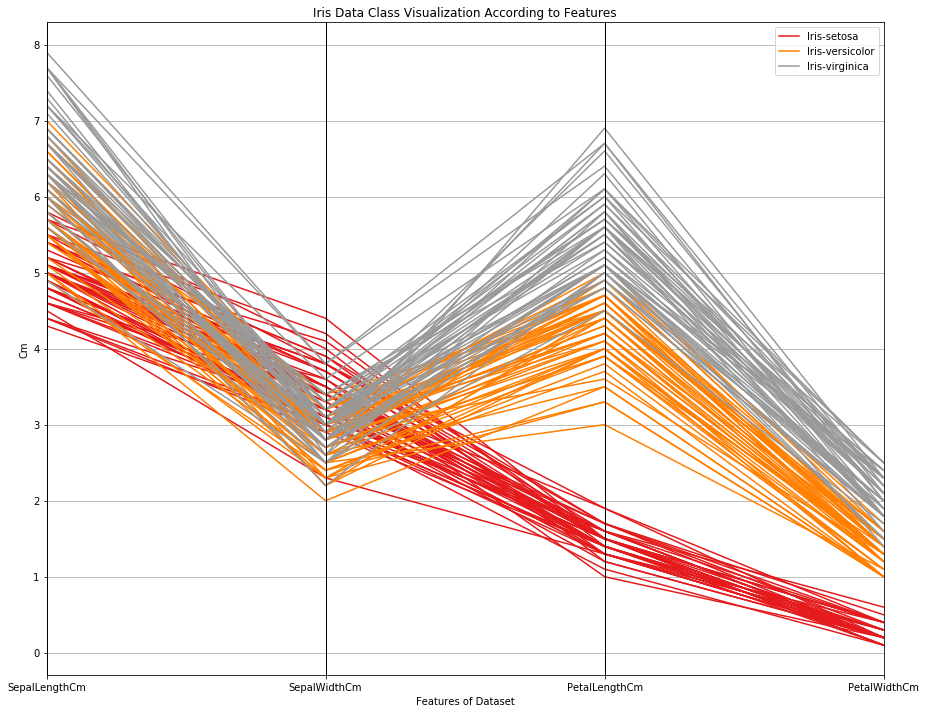

In [4]:
# Parallel Plots
data = data.drop(['Id'],axis=1)
plt.figure(figsize=(15,12))
parallel_coordinates(data,'Species', colormap=plt.get_cmap('Set1'))
plt.title('Iris Data Class Visualization According to Features')
plt.xlabel('Features of Dataset')
plt.ylabel('Cm')
plt.savefig('graph.png')
plt.show()

In [5]:
corr = data.iloc[:, 0:4].corr()
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


C:\Users\berka\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


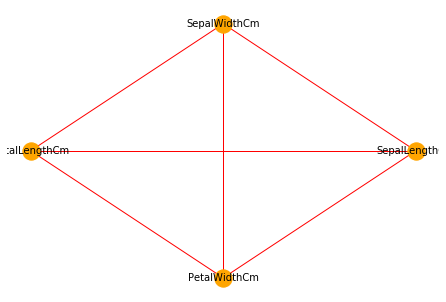

In [6]:
# Network Charts
links = corr.stack().reset_index()
links.columns = ['var1','var2','value']
threshold = -1
links_filtered = links.loc[(links['value'] >= threshold) & (links['var1'] != links['var2'])]
G = nx.from_pandas_edgelist(links_filtered, source='var1', target='var2', edge_attr=None, create_using=None)
nx.draw_circular(G, with_labels=True, node_color='orange', node_size=300, edge_color='red', linewidths=1, font_size = 10)
plt.show()

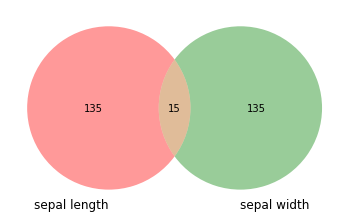

In [7]:
# Venn Diagram
sepal_length = data.iloc[:,0]
sepal_width = data.iloc[:,1]
petal_length = data.iloc[:,2]
petal_width = data.iloc[:,3]
venn2(subsets = (len(sepal_length)-15, len(sepal_width)-15, 15), set_labels=('sepal length', 'sepal width'))
plt.show()

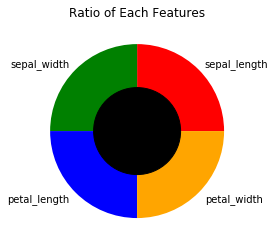

In [8]:
# Donut Plot
labels = 'sepal_length','sepal_width','petal_length','petal_width'
feature_size = [len(sepal_length),len(sepal_width),len(petal_length),len(petal_width)]
circle = plt.Circle((0,0),0.5, color = 'black')
plt.pie(feature_size, labels=labels, colors=['red','green','blue','orange'])
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Ratio of Each Features')
plt.show()

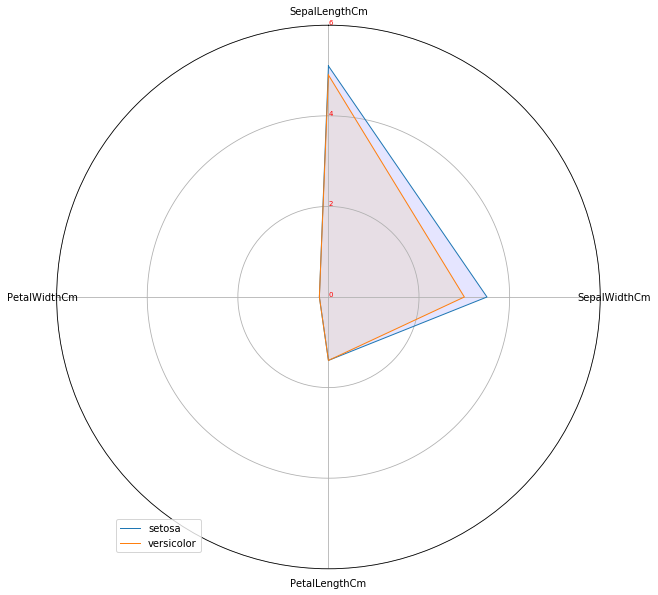

In [9]:
# Spider Chart
categories = list(data)[:4]
N = len(categories)
angles = [ n / float(N)*2*pi for n in range(N)]
angles = angles + angles[:1]
plt.figure(figsize = (10,10))
ax = plt.subplot(111,polar = True)
ax.set_theta_offset(pi/2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1],categories)
ax.set_rlabel_position(0)
plt.yticks([0,2,4,6],["0","2","4","6"],color= "red", size = 7)
plt.ylim(0,6)

values = data.loc[0].drop("Species").values.flatten().tolist()
values = values + values[:1]
ax.plot(angles,values,linewidth = 1,linestyle="solid",label ="setosa" )
ax.fill(angles,values,"b",alpha=0.1)

values = data.loc[1].drop("Species").values.flatten().tolist()
values = values + values[:1]
ax.plot(angles,values,linewidth = 1,linestyle="solid",label ="versicolor" )
ax.fill(angles,values,"orange",alpha=0.1)
plt.legend(loc = "upper left",bbox_to_anchor = (0.1,0.1))
plt.show()

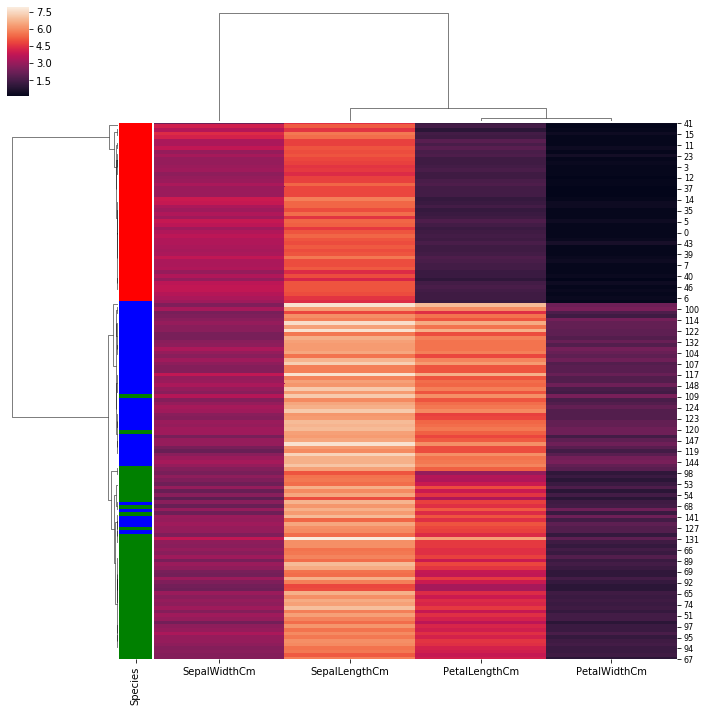

In [10]:
df = data.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
df1 = data.Species
x = dict(zip(df1.unique(),"rgb"))
row_colors = df1.map(x)
cg = sns.clustermap(df,row_colors=row_colors,figsize=(12, 12),metric="correlation")
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(),rotation = 0,size =8)
plt.show()